In [67]:
""" 
Gaol: EDA of level 03
Author: Rudra Prasad Bhuyan
"""

' \nGaol: EDA of level 03\nAuthor: Rudra Prasad Bhuyan\n'

In [68]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [69]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [70]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-03\data2\lev_03_mp_clean.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('FSU_Serial_No', Int32),
        ('HH_Size_FDQ', Int32),
        ('Household_Type', Int32),
        ('Religion_of_HH_Head', Int32),
        ('Land_Ownership', Int32),
        ('Type_of_Land_Owned', Int32),
        ('Total_Area_Land_Owned_Acres', Int32),
        ('Energy_Source_Cooking', Int32),
        ('Energy_Source_Lighting', Int32),
        ('Dwelling_Unit_Exists', Int32),
        ('Type_of_Dwelling_Unit', Int32),
        ('Rent_Rate_Available_Rural', Int32),
        ('Multiplier', Int32),
        ('Self_Employment_Source_Sector', Int32),
        ('Regular_Wage_Source_Sector', Int32),
        ('Casual_Labour_Source_Sector', Int32),
        ('Ration_Card_Type', Int32),
        ('Engaged_in_Economic_Activity_Las', Int32),
        ('Max_Income_Activity', Int32),
        ('Benefitted_From_PMGKY', Int32)])

# Functions 

In [71]:
def draw_pie_sector(col: str) -> None:
    sector_df = pdf[col].value_counts().to_pandas()
    display(sector_df)

    plt.pie(
        sector_df['count'],
        labels=sector_df[col],
        autopct='%1.2f%%'
    )
    plt.title(f"{col} Percentage")
    plt.show()

# 1. Basic Descriptive Questions

## What is the **average household size (`HH_Size_FDQ`)**?

In [72]:
pdf['HH_Size_FDQ'].describe()

statistic,value
str,f64
"""count""",56420.0
"""null_count""",0.0
"""mean""",4.598653
"""std""",2.152007
"""min""",1.0
"""25%""",3.0
"""50%""",4.0
"""75%""",6.0
"""max""",31.0


In [73]:
hh_size_count = pdf['HH_Size_FDQ'].value_counts().to_pandas()
hh_size_count

,HH_Size_FDQ,count
0,25,4
1,3,7488
2,15,32
3,6,7356
4,14,84
5,7,3568
6,8,1888
7,17,8
8,10,792
9,1,2692


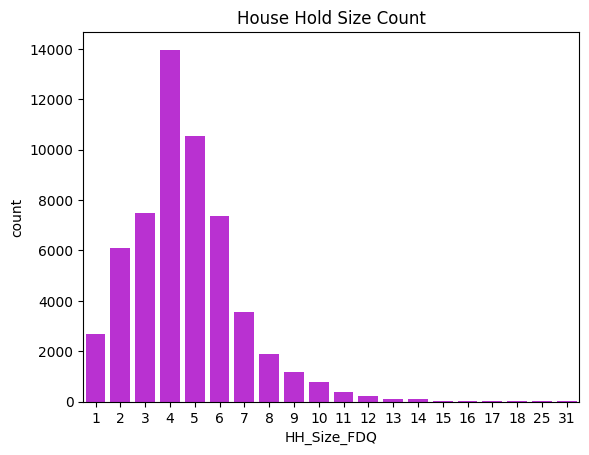

In [74]:
sns.barplot(hh_size_count, 
            x=hh_size_count['HH_Size_FDQ'], 
            y=hh_size_count['count']
)

plt.title('House Hold Size Count')
plt.show()

## How are households distributed by **type (`Household_Type`)**?

,Household_Type,count
0,3,3556
1,1,25728
2,4,1808
3,6,5084
4,2,10268
5,9,3248
6,5,6728


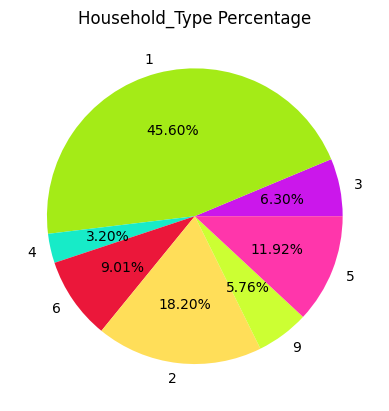

In [75]:
draw_pie_sector('Household_Type')


|Value | Category |
|-----------|-----------------|
|01  |Not Reported |
|02  |Hinduism |
|30  |Islam |
|04  |Christianity |
|05  |Sikhism |
|06  |Jainism |
|07  |Buddhism |
|08  |Zoroastrianism |
|09  |Others |


## What is the **distribution of religions** among household heads?

Religion_of_HH_Head,count
i32,u32
1,51936
3,132
7,4
9,68
4,152
2,3676
5,452


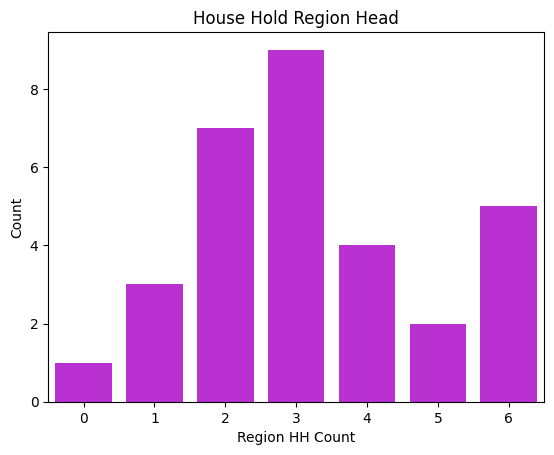

In [76]:
region_hh_count = pdf['Religion_of_HH_Head'].value_counts()
display(region_hh_count)

sns.barplot(region_hh_count['Religion_of_HH_Head'])
plt.xlabel('Region HH Count')
plt.ylabel('Count')
plt.title('House Hold Region Head')
plt.show()

## What percentage of households **own land** (`Land_Ownership`)?

,Land_Ownership,count
0,1,54348
1,2,2072


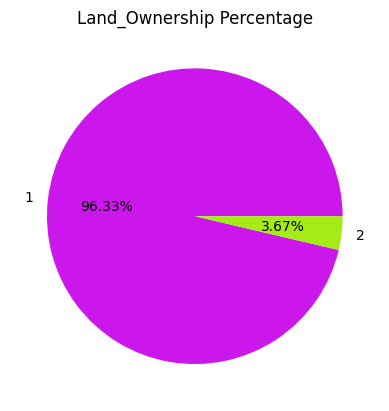

In [77]:
draw_pie_sector('Land_Ownership')

##  What are the **most common sources of energy** for cooking and lighting?

| Value | Category                                                      |
| ----- | ------------------------------------------------------------- |
| 01    | firewood, chips & crop residue                                |
| 02    | LPG                                                           |
| 03    | other natural gas                                             |
| 04    | dung cake                                                     |
| 05    | kerosene                                                      |
| 06    | coke, coal                                                    |
| 07    | gobar gas                                                     |
| 08    | other biogas                                                  |
| 09    | others                                                        |
| 10    | charcoal                                                      |
| 11    | electricity (incl. generated by solar /wind power generators) |
| 12    | no cooking arrangement                                        |


In [78]:
energy_df = pdf['Energy_Source_Cooking'].value_counts().to_pandas()
energy_df = energy_df.sort_values(by='Energy_Source_Cooking', ascending=False)
display(energy_df)

,Energy_Source_Cooking,count
0,12,444
8,11,4
4,9,128
5,7,28
7,6,44
3,4,332
6,3,276
2,2,30020
1,1,25144


In [79]:
light_df = pdf['Energy_Source_Lighting'].value_counts().to_pandas()
light_df 

,Energy_Source_Lighting,count
0,6,24
1,5,8
2,1,56296
3,2,8
4,9,84


## How many households **have a dwelling unit** and what are the **types**?

In [80]:
pdf['Dwelling_Unit_Exists'].value_counts()
# {1:Y, 2:0}   

Dwelling_Unit_Exists,count
i32,u32
2,820
1,55600


In [81]:
pdf['Type_of_Dwelling_Unit'].value_counts()
# {1:Owned, 2:Hired, 3:Others}

Type_of_Dwelling_Unit,count
i32,u32
1,51108
2,4760
3,552


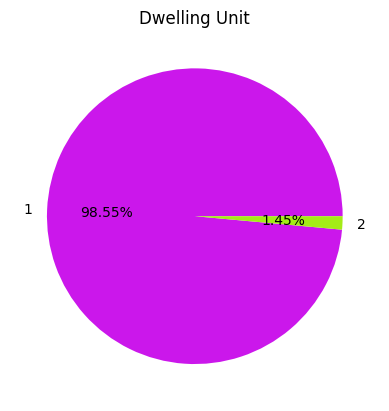

In [82]:
dwelling_unit_count = pdf['Dwelling_Unit_Exists'].value_counts()
plt.pie(
    dwelling_unit_count['count'],
    labels=dwelling_unit_count['Dwelling_Unit_Exists'],
    autopct='%1.2f%%'
)
plt.title('Dwelling Unit')
plt.show()

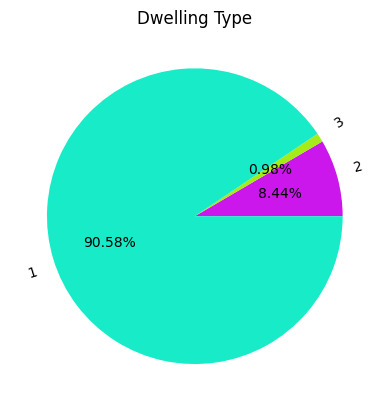

In [83]:
type_dwelling_count = pdf['Type_of_Dwelling_Unit'].value_counts()
plt.pie(
    type_dwelling_count['count'],
    labels=type_dwelling_count['Type_of_Dwelling_Unit'],
    autopct='%1.2f%%',
    rotatelabels=2
)
plt.title('Dwelling Type')
plt.show()

# {1:Owned, 2:Hired, 3:Others}

#  2. Socioeconomic and Livelihood Questions

## What proportion of households are **engaged in economic activity** (`Engaged_in_Economic_Activity_Las`)?

,Engaged_in_Economic_Activity_Las,count
0,1,53172
1,2,3248


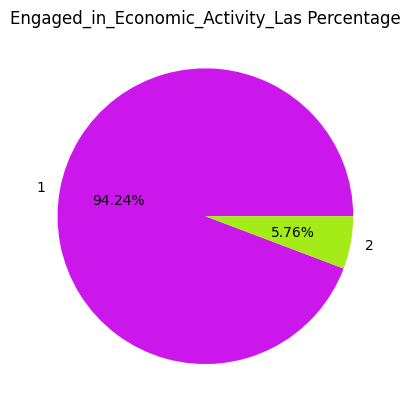

In [84]:
draw_pie_sector('Engaged_in_Economic_Activity_Las')

## Which sectors are most common for **self-employment**, **regular wage**, and **casual labour**?


,Self_Employment_Source_Sector,count
0,1,53864
1,2,2556


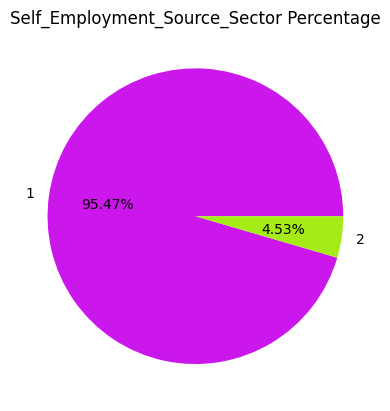

In [85]:
draw_pie_sector('Self_Employment_Source_Sector')

,Regular_Wage_Source_Sector,count
0,3,112
1,4,56308


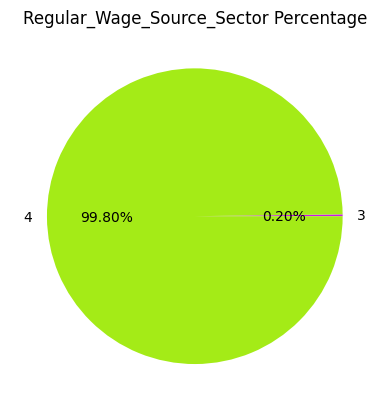

In [86]:
draw_pie_sector('Regular_Wage_Source_Sector')

,Casual_Labour_Source_Sector,count
0,5,6728
1,6,49692


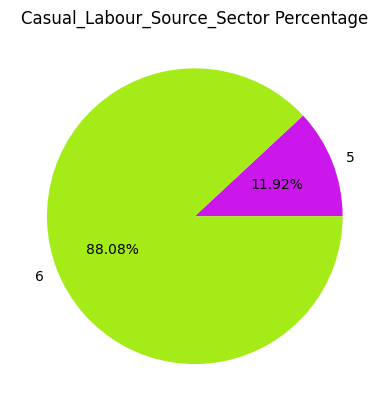

In [87]:
draw_pie_sector('Casual_Labour_Source_Sector')

## What is the **most frequent income-generating activity** (`Max_Income_Activity`)?


,Max_Income_Activity,count
0,1,28284
1,2,12880
2,3,15256


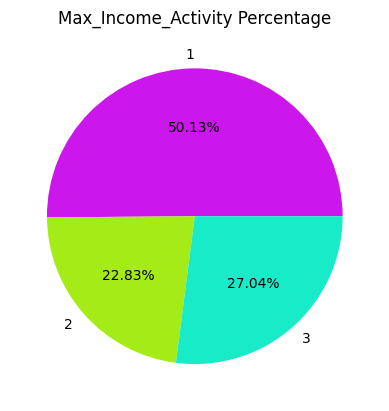

In [88]:
draw_pie_sector('Max_Income_Activity')

## How does **land ownership** correlate with **type of economic activity**?


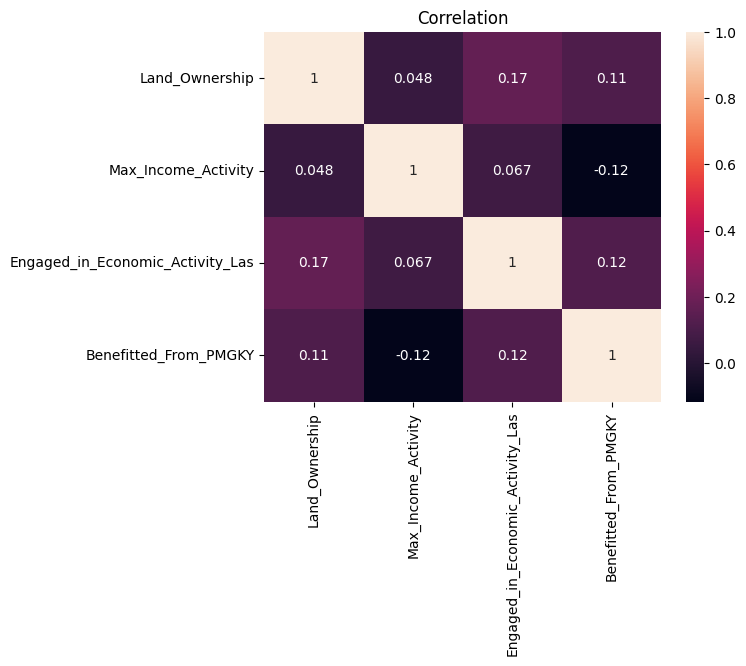

In [89]:
sns.heatmap(pdf['Land_Ownership', 'Max_Income_Activity', 'Engaged_in_Economic_Activity_Las', 'Benefitted_From_PMGKY'].to_pandas().corr(), annot=True)
plt.title('Correlation')
plt.show()

##  Does **dwelling type** or **energy source** vary by **income sector**?


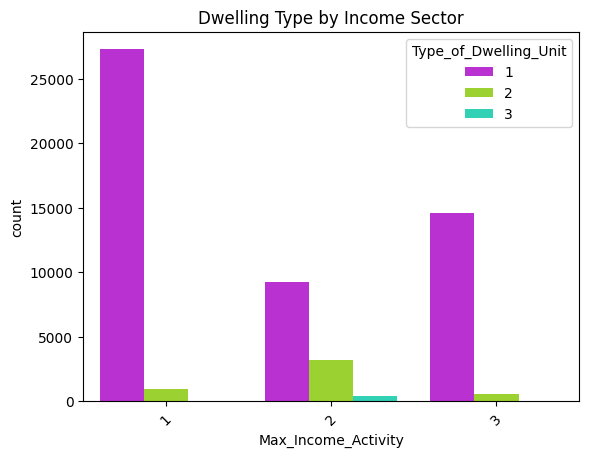

In [90]:
sns.countplot(
    data=pdf,
    x=pdf['Max_Income_Activity'],
    hue=pdf['Type_of_Dwelling_Unit'],
    palette=palette[:3]
)
plt.xticks(rotation=45)
plt.title('Dwelling Type by Income Sector')
plt.show()

# 3. Land and Property Questions

## What percentage of households **own agricultural vs. non-agricultural land** (`Type_of_Land_Owned`)?

,Self_Employment_Source_Sector,count
0,2,2556
1,1,53864


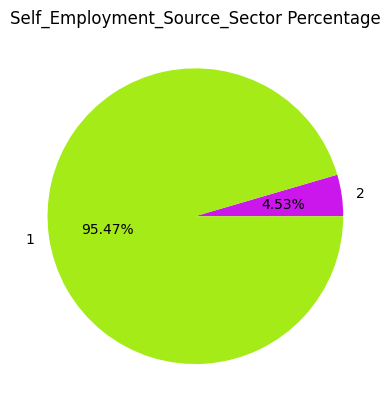

In [91]:
draw_pie_sector('Self_Employment_Source_Sector')

##  What is the **average area of land owned (in acres)**?


In [92]:
# useless features
pdf['Total_Area_Land_Owned_Acres'].describe()

statistic,value
str,f64
"""count""",0.0
"""null_count""",56420.0


## Is there a **relationship between land ownership** and **household type or religion**?


In [93]:
pdf['Land_Ownership', 'Household_Type']

Land_Ownership,Household_Type
i32,i32
1,1
1,1
1,1
1,1
1,5
…,…
1,1
1,1
1,2


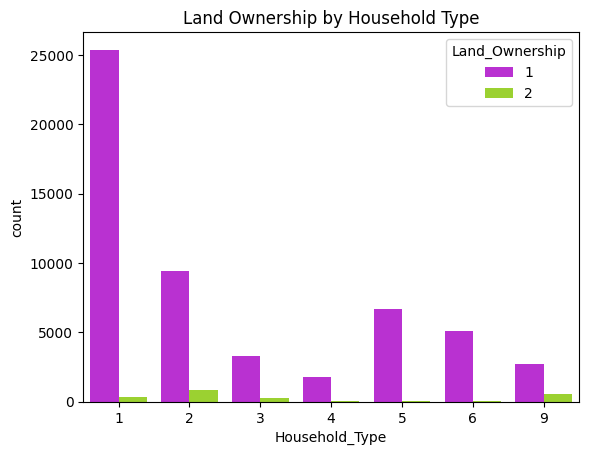

In [94]:
sns.countplot(
    data=pdf,
    x='Household_Type',
    hue='Land_Ownership',
    palette=palette[:3]
)
#plt.xticks(rotation=45)
plt.title('Land Ownership by Household Type')
plt.show()


#  4. Infrastructure and Energy Access

## Which **energy sources for cooking** are most used in rural vs. urban areas?

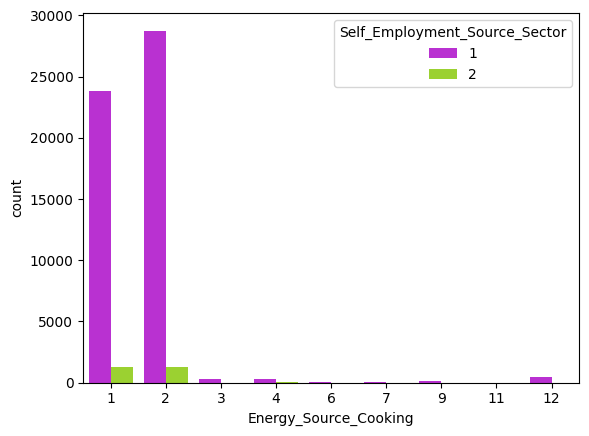

In [95]:
sns.countplot(
    data=pdf,
    x=pdf['Energy_Source_Cooking'],
    hue=pdf['Self_Employment_Source_Sector'],
    palette=palette[:3]
)
plt.show()

## How many households **lack access to electricity or clean fuel**?

In [96]:
energy_emp = pdf.group_by(['Energy_Source_Lighting', 'Self_Employment_Source_Sector']) \
    .count() \
    .to_pandas() \
    .sort_values(by='count', ascending=False)


energy_pivot = energy_emp.pivot(
    index='Energy_Source_Lighting',
    columns='Self_Employment_Source_Sector',
    values='count'   
)

display(energy_pivot)

Self_Employment_Source_Sector,1,2
Energy_Source_Lighting,,
1,53740.0,2556.0
2,8.0,NaN
5,8.0,NaN
6,24.0,NaN
9,84.0,NaN


In [97]:
cooking_emp = pdf.group_by(['Energy_Source_Cooking', 'Self_Employment_Source_Sector']) \
    .count() \
    .to_pandas() \
    .sort_values(by='count', ascending=False)
    
cooking_emp.pivot(
    index='Energy_Source_Cooking',
    columns='Self_Employment_Source_Sector',
    values='count'
)

Self_Employment_Source_Sector,1,2
Energy_Source_Cooking,,
1,23864.0,1280.0
2,28760.0,1260.0
3,276.0,NaN
4,320.0,12.0
6,44.0,NaN
7,24.0,4.0
9,128.0,NaN
11,4.0,NaN
12,444.0,NaN


## ow many households **lack access to electricity or clean fuel**?

In [98]:
import polars as pl

# Households lacking electricity
no_electricity = pdf.filter(~pl.col('Energy_Source_Lighting') == 1).height
total_households = pdf.height
percent_no_electricity = (no_electricity / total_households) * 100

print(f"Households without electricity: {no_electricity} ({percent_no_electricity:.2f}%)")


Households without electricity: 0 (0.00%)


In [99]:
unclean_fuel = pdf.filter(~pl.col('Energy_Source_Cooking').is_in([2, 11])).height
percent_unclean = (unclean_fuel / total_households) * 100

print(f"Households using unclean cooking fuel: {unclean_fuel} ({percent_unclean:.2f}%)")


Households using unclean cooking fuel: 26396 (46.78%)


## Is there a relationship between **energy source** and **dwelling type**?

In [100]:
energy_dwelling_ct = pdf.group_by(['Energy_Source_Cooking', 'Type_of_Dwelling_Unit']).count()
energy_dwelling_ct = energy_dwelling_ct.sort(['Energy_Source_Cooking', 'Type_of_Dwelling_Unit']).to_pandas()

energy_dwelling_ct.pivot(
    index='Energy_Source_Cooking', 
    columns='Type_of_Dwelling_Unit', 
    values='count'
)

Type_of_Dwelling_Unit,1,2,3
Energy_Source_Cooking,,,
1,25004.0,64.0,76.0
2,25340.0,4440.0,240.0
3,268.0,8.0,NaN
4,328.0,4.0,NaN
6,44.0,NaN,NaN
7,28.0,NaN,NaN
9,32.0,76.0,20.0
11,NaN,4.0,NaN
12,64.0,164.0,216.0


In [101]:
import polars as pl

# Count beneficiaries
benefit_counts = pdf.group_by('Benefitted_From_PMGKY').count()
display(benefit_counts)

# Calculate proportions
total_households = pdf.height
benefit_counts = benefit_counts.with_columns(
    (pl.col('count') / total_households * 100).alias('percent')
)
display(benefit_counts)


Benefitted_From_PMGKY,count
i32,u32
1,28488
2,27932


Benefitted_From_PMGKY,count,percent
i32,u32,f64
1,28488,50.492733
2,27932,49.507267


# 5. Policy Impact / Welfare Analysis

## What proportion of households **benefitted from PMGKY** (`Benefitted_From_PMGKY`)?

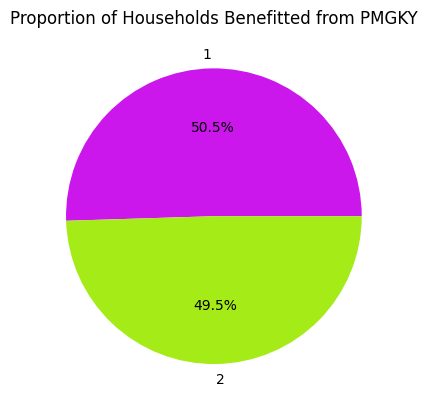

In [102]:
import matplotlib.pyplot as plt

benefit_counts_df = benefit_counts.to_pandas()
plt.pie(
    benefit_counts_df['count'],
    labels=benefit_counts_df['Benefitted_From_PMGKY'],
    autopct='%1.1f%%'
)
plt.title('Proportion of Households Benefitted from PMGKY')
plt.show()


## Are **PMGKY beneficiaries** more common among certain **income sectors or landless households**?

In [103]:
benefit_income = pdf.group_by(['Benefitted_From_PMGKY', 'Max_Income_Activity']).count()
benefit_income = benefit_income.sort(['Benefitted_From_PMGKY', 'count'], )
display(benefit_income)

Benefitted_From_PMGKY,Max_Income_Activity,count
i32,i32,u32
1,2,3644
1,3,10528
1,1,14316
2,3,4728
2,2,9236
2,1,13968


In [104]:
benefit_land = pdf.group_by(['Benefitted_From_PMGKY', 'Land_Ownership']).count()
benefit_land = benefit_land.sort(['Benefitted_From_PMGKY', 'count'])
display(benefit_land)


Benefitted_From_PMGKY,Land_Ownership,count
i32,i32,u32
1,2,456
1,1,28032
2,2,1616
2,1,26316


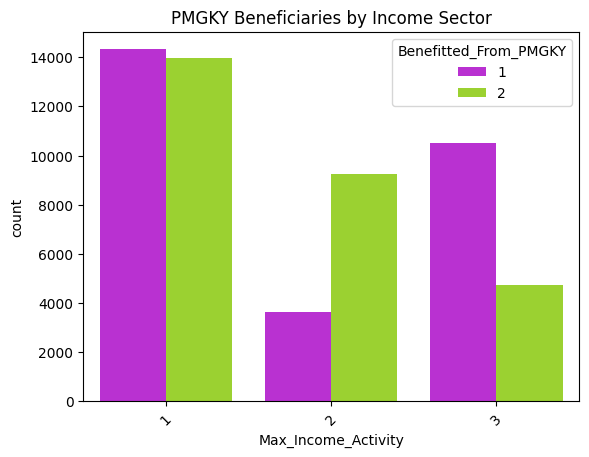

In [105]:
import seaborn as sns

sns.countplot(
    data=pdf.to_pandas(),
    x='Max_Income_Activity',
    hue='Benefitted_From_PMGKY',
    palette=palette[:3]
)
plt.xticks(rotation=45)
plt.title('PMGKY Beneficiaries by Income Sector')
plt.show()


## Does **household size** influence **beneficiary status**?

In [106]:
benefit_size = pdf.group_by('Benefitted_From_PMGKY').agg(
    [
        pl.mean('HH_Size_FDQ').alias('avg_HH_Size'),
        pl.median('HH_Size_FDQ').alias('median_HH_Size')
    ]
)
display(benefit_size)


Benefitted_From_PMGKY,avg_HH_Size,median_HH_Size
i32,f64,f64
1,4.769868,5.0
2,4.42403,4.0


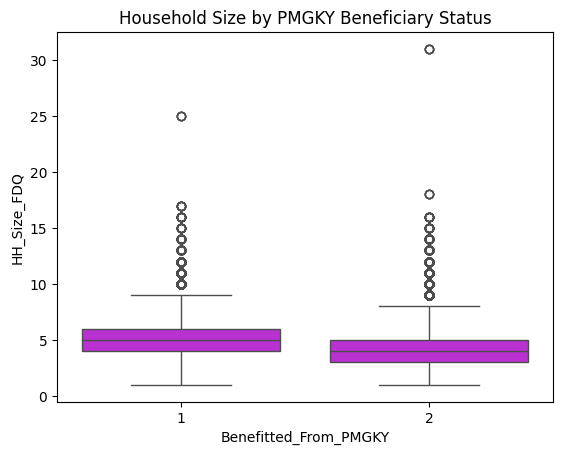

In [107]:
sns.boxplot(
    data=pdf.to_pandas(),
    x='Benefitted_From_PMGKY',
    y='HH_Size_FDQ'
)
plt.title('Household Size by PMGKY Beneficiary Status')
plt.show()


## Ration Card Type

,Ration_Card_Type,count
0,1,1828
1,9,1452
2,2,26316
3,3,4696
4,0,17668
5,4,3464
6,5,996


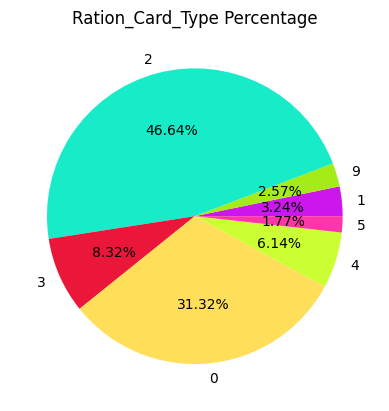

In [108]:
draw_pie_sector(col='Ration_Card_Type')

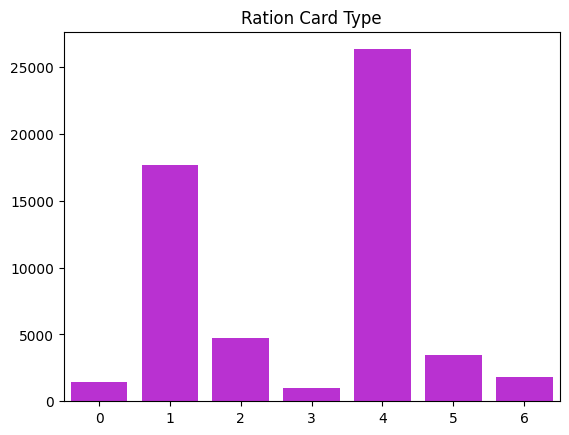

In [109]:
sns.barplot(pdf['Ration_Card_Type'].value_counts()['count'])
plt.title('Ration Card Type')
plt.show()


| Value | Category                          |
| ----- | --------------------------------- |
| 0     | No ration card                    |
| 1     | Antyodaya Anna Yojana (AAY)       |
| 2     | Below Poverty Line (BPL)          |
| 3     | Above Poverty Line (APL)          |
| 4     | Priority House Holds (PHH)        |
| 5     | State Food Security Scheme (SFSS) |
| 6/9    | Others                            |

## Rent Available in rural are

In [110]:
pdf['Rent_Rate_Available_Rural'].value_counts()

Rent_Rate_Available_Rural,count
i32,u32
2,52960
1,3460


,Rent_Rate_Available_Rural,count
0,2,52960
1,1,3460


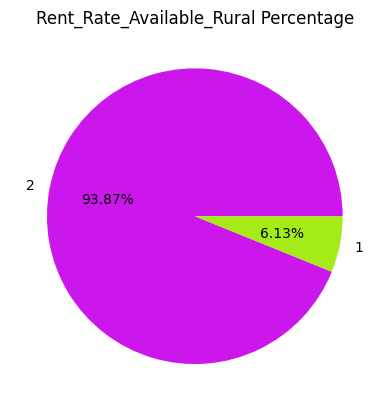

In [112]:
draw_pie_sector( col='Rent_Rate_Available_Rural')

In [111]:
pdf.columns

['FSU_Serial_No',
 'HH_Size_FDQ',
 'Household_Type',
 'Religion_of_HH_Head',
 'Land_Ownership',
 'Type_of_Land_Owned',
 'Total_Area_Land_Owned_Acres',
 'Energy_Source_Cooking',
 'Energy_Source_Lighting',
 'Dwelling_Unit_Exists',
 'Type_of_Dwelling_Unit',
 'Rent_Rate_Available_Rural',
 'Multiplier',
 'Self_Employment_Source_Sector',
 'Regular_Wage_Source_Sector',
 'Casual_Labour_Source_Sector',
 'Ration_Card_Type',
 'Engaged_in_Economic_Activity_Las',
 'Max_Income_Activity',
 'Benefitted_From_PMGKY']